In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.metrics import multilabel_confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from naive_bayes_classifier import MyNaiveBayesClassifier

## Загрузка и изучение данных

In [2]:
data = load_iris()
X, y = data.data, data.target
print(X.shape, y.shape)

(150, 4) (150,)


In [3]:
df = pd.DataFrame(
    data = np.concatenate((data.data, data.target[:, None]), axis=1), 
    columns = [*data.feature_names, 'target'])
df['target'] = df['target'].astype('int32')
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
60,5.0,2.0,3.5,1.0,1
103,6.3,2.9,5.6,1.8,2
35,5.0,3.2,1.2,0.2,0
1,4.9,3.0,1.4,0.2,0
139,6.9,3.1,5.4,2.1,2


Рассмотрим распределения числовых признаков

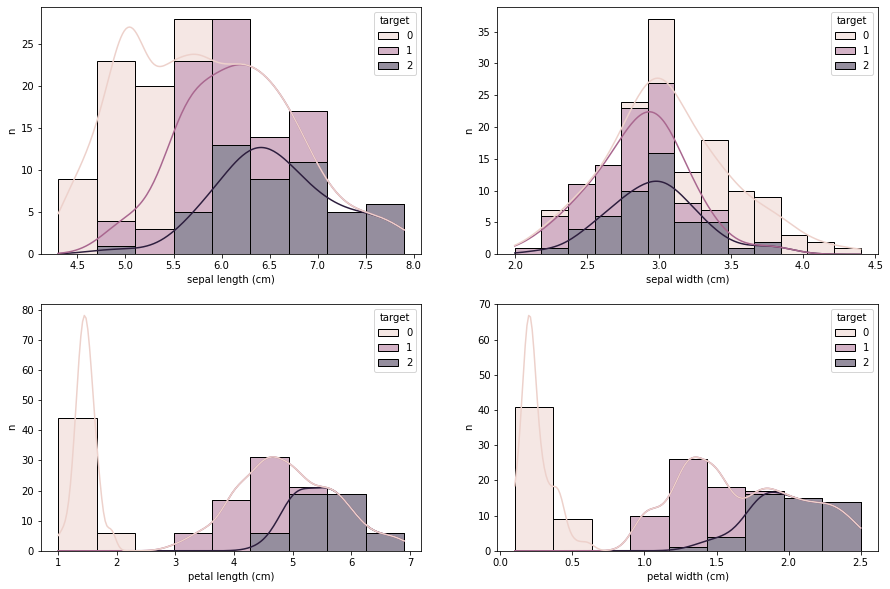

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, axis in enumerate(axes.flat):
    sns.histplot(data=df, x=df.iloc[:, i], ax=axis, kde=True, hue='target', multiple='stack')
    axis.set_xlabel(data.feature_names[i])
    axis.set_ylabel('n')

## Обучение и предсказывание

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [6]:
nb_clf = MyNaiveBayesClassifier()
nb_clf.fit(X_train, y_train)

In [7]:
cls_preds = nb_clf.predict(X_test)
unique, counts = np.unique(cls_preds, return_counts=True)
np.asarray((unique, counts)).T

array([[0, 5],
       [1, 2],
       [2, 8]], dtype=int64)

Точность предсказаний и ошибки:

In [8]:

print(f'Precision: {precision_score(y_test, cls_preds, average="macro")}')
print(f'Confusion matrix:\n{multilabel_confusion_matrix(y_test, cls_preds)}')

Precision: 1.0
Confusion matrix:
[[[10  0]
  [ 0  5]]

 [[13  0]
  [ 0  2]]

 [[ 7  0]
  [ 0  8]]]


Вывод: модель имеет небольшую ошибку в определении 2 и 3 классов. Ошибка возникла вследствие наивности предположения о распределении признаков, т.к. некоторые из условных распределений только напоминают нормальные, а признаки в сущности имеют зависимость.